In [1]:
import numpy as np
import pandas as pd

from sklearn import cross_validation
from sklearn import preprocessing
import xgboost as xgb

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
train_df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

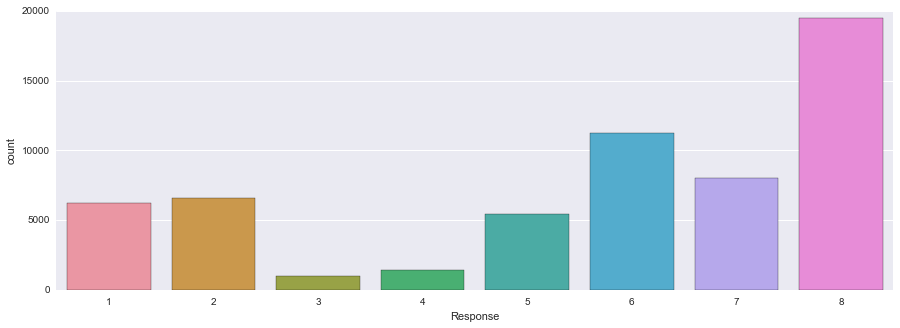

In [6]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

sns.countplot(x=train_df["Response"], order=[1,2,3,4,5,6,7,8], ax=axis1)

# Encode NonNumeric columns

In [7]:
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        encoder = preprocessing.LabelEncoder()
        encoder.fit(list(train_df[col].values) + list(test_df[col].values))
        train_df[col] = encoder.transform(list(train_df[col].values))
        test_df[col] = encoder.transform(list(test_df[col].values))

In [8]:
train_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,16,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,0,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,18,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,17,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,15,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


# Fill NA

In [9]:
for col in train_df.columns:
    if col == 'Response':
        continue
    if train_df[col].dtype == 'float64':
        train_df[col].fillna(train_df[col].mean(), inplace=True)
        test_df[col].fillna(test_df[col].mean(), inplace=True)
    else:
        train_df[col].fillna(train_df[col].median(), inplace=True)
        test_df[col].fillna(test_df[col].median(), inplace=True)

In [10]:
test_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,16,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,16,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,0,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,0,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_features = train_df.drop(['Id', 'Response'], axis=1)
train_target = train_df['Response']
test_index = test_df['Id']
test_features = test_df.drop('Id', axis=1)

# Get Validation Dataset

In [12]:
val_index = np.random.randint(0, train_df.shape[0], 2000)
val_data = train_df.ix[val_index]
val_data.shape

(2000, 128)

In [13]:
val_target = val_data['Response'].values
val_features = val_data.drop(['Id', 'Response'], axis=1)

# Xgboost Params

In [14]:
dtrain = xgb.DMatrix(train_features, label=train_target)
dval  = xgb.DMatrix(val_features, label=val_target)

In [15]:
params = {
    'eta': 0.025,
    'objective':'reg:linear',
    'depth': 20,
    'eval_metric': 'rmse',
    'nthread':2,
    'subsample': 0.7,
    'colsample_bytree': 0.65,
    'min_child_weight': 3
}

num_round = 5000
watchlist = [(dtrain, 'train'), (dval, 'validation')]

gbm = xgb.train(params, dtrain, num_round, watchlist)

[0]	train-rmse:5.569754	validation-rmse:5.491756
[1]	train-rmse:5.449334	validation-rmse:5.372213
[2]	train-rmse:5.331606	validation-rmse:5.255798
[3]	train-rmse:5.217885	validation-rmse:5.143321
[4]	train-rmse:5.108057	validation-rmse:5.034743
[5]	train-rmse:5.000788	validation-rmse:4.928640
[6]	train-rmse:4.897045	validation-rmse:4.825962
[7]	train-rmse:4.798153	validation-rmse:4.727563
[8]	train-rmse:4.699986	validation-rmse:4.630407
[9]	train-rmse:4.603948	validation-rmse:4.535238
[10]	train-rmse:4.511769	validation-rmse:4.444116
[11]	train-rmse:4.421181	validation-rmse:4.354638
[12]	train-rmse:4.333839	validation-rmse:4.268194
[13]	train-rmse:4.249866	validation-rmse:4.185205
[14]	train-rmse:4.167063	validation-rmse:4.103661
[15]	train-rmse:4.087212	validation-rmse:4.024907
[16]	train-rmse:4.011434	validation-rmse:3.949931
[17]	train-rmse:3.936042	validation-rmse:3.875858
[18]	train-rmse:3.862721	validation-rmse:3.803175
[19]	train-rmse:3.791989	validation-rmse:3.733597
[20]	train

# Predict

In [16]:
dtest  = xgb.DMatrix(test_features)
preds = gbm.predict(dtest)

def output(x):
    if x < 1:
        return 1
    elif x > 8:
        return 8
    elif x == 3:
        return 2
    else:
        return int(round(x))

result = [output(x) for x in preds]

In [17]:
submit_df = pd.DataFrame({'Id': test_index, 'Response': result})
submit_df.to_csv('prudential_xgboost_tune.csv', index=False)